<a href="https://colab.research.google.com/github/Quja11/BAaS/blob/main/%D0%A2%D0%B0%D1%85%D0%B0%D0%B5%D0%B2_%D0%9F%D0%98321_4%D0%B7%D0%B0%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**РГР Корреляция и регрессия**

Тахаев А.Г., ПИ-321, 19130600

In [2179]:
#Библиотека для работы с массивами
import numpy as np

In [2180]:
#Начальное состояние генератора: номер зачетки (пришлось исправить последнюю цифру, т.к. выдает ошибку, если начинать с нуля для нормального распределения)
np.random.seed(19130601)

In [2181]:
#Объем выборки (100 чисел)
N = 100

In [2182]:
#Генератор случайных чисел с равномерным распределением
x = np.random.uniform(low = 150, high = 200, size = N)

In [2183]:
#Вызов описания генератора равномерного распределения
np.random.uniform?

In [2184]:
#Генератор случайных чисел с нормальным распределением, где начальное состояние генератора номер зачетки в обратном порядке
np.random.seed(10603191)
e = np.random.normal(loc = 0, scale = 10, size = N)

In [2185]:
#Вызов описания генератора нормального распределения
np.random.normal?

In [2186]:
#Разброс вокруг прямой линии
y = -100 + x + e

In [2187]:
#Импорт графической библиотеки
import matplotlib.pyplot as plt

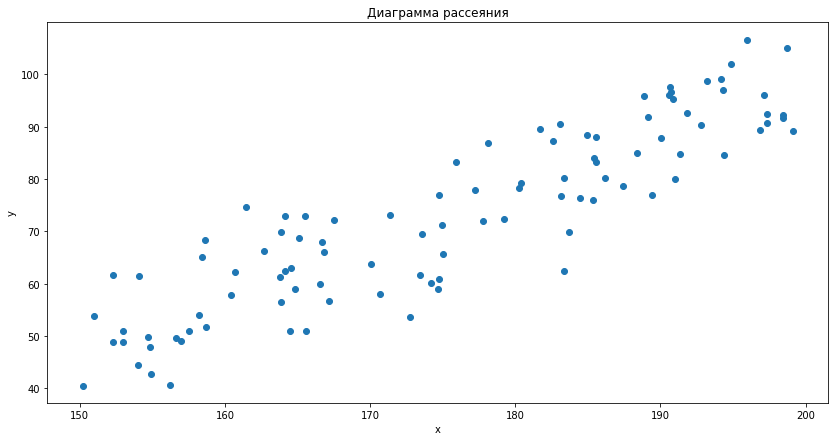

In [2188]:
#Строим и выводим точечный график, указывая его размеры, заголовок и заголовки по осям
plt.figure(figsize=(14, 7)) 
plt.scatter(x, y)
plt.title("Диаграмма рассеяния")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Корреляционный анализ**

In [2189]:
#Импорт модуля статистического анализа
import scipy.stats as st

In [2190]:
#Коэффицент линейной корреляции Пирсона
r = st.pearsonr(x, y)[0]

In [2191]:
#Коэффицент корреляция рангов Спирмена
rho = st.spearmanr(x, y)[0]

In [2192]:
#Коэффицент корреляции рангов Кендалла
tau = st.kendalltau(x, y)[0]

In [2193]:
#Вывод коэффицентов на англ. языке через f-строку
print(f"Pearson's r: \t{r}")
print(f"Spearman's rho: {rho}")
print(f"Kendall's tau: \t{tau}")

Pearson's r: 	0.8957052434771419
Spearman's rho: 0.8930813081308131
Kendall's tau: 	0.7038383838383839


In [2194]:
#Вывод коэффицентов на русском языке через f-строку
print(f"Коэффицент линейной корреляции Пирсона: {r:.3f}")
print(f"Коэффицент корреляции рангов Спирмена: \t{rho:.3f}")
print(f"Коэффицент корреляции рангов Кендалла: \t{tau:.3f}")

Коэффицент линейной корреляции Пирсона: 0.896
Коэффицент корреляции рангов Спирмена: 	0.893
Коэффицент корреляции рангов Кендалла: 	0.704


**Регрессионый анализ**

In [2195]:
#Коэффиценты уравнения регрессии y(x)
results_yx = st.linregress(x, y)
a = results_yx.intercept
b = results_yx.slope
a, b 

(-108.13934956289732, 1.0314429421684268)

In [2196]:
#Вывод уравнения регрессии через f-строку
print(f"Уравнение регрессии: y = {a:.3f} + {b:.3f}x")

Уравнение регрессии: y = -108.139 + 1.031x


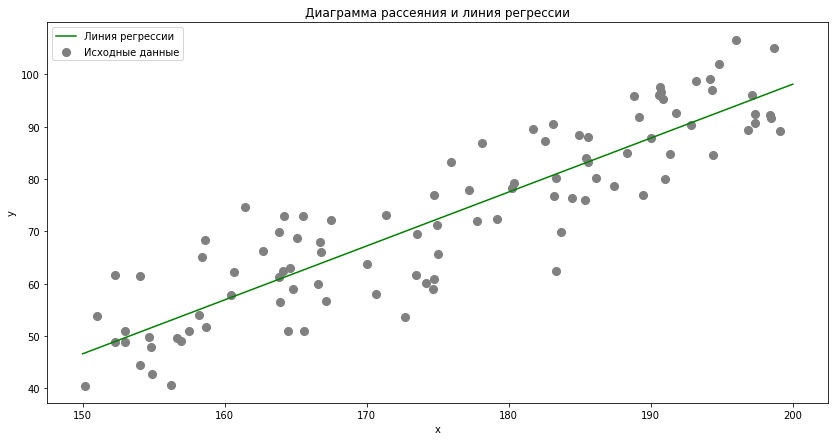

In [2197]:
#Диаграмма рассеяния и линия регрессии, данные для линии регрессии и дефолтная настройка
plt.figure(figsize=(14, 7))
plt.scatter(x, y, c = "gray", s = 65, label = "Исходные данные")

x_yx = np.array([150, 200])
y_yx = a + b * x_yx

plt.plot(x_yx, y_yx, color = "green", label = "Линия регрессии")
plt.title("Диаграмма рассеяния и линия регрессии")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Регрессия y = f(x)**

In [2198]:
#Коэффиценты уравнения регрессии x(y)
results_xy = st.linregress(y, x)
c = results_xy.intercept
d = results_xy.slope
c, d

(118.82443920163952, 0.7778306006009188)

**Пересечение линий регрессии**

In [2199]:
#Средние значения пересечения
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean, y_mean

(175.560024054187, 72.9407981747131)

**Диаграмма рассеяния + линии регрессии + пересечение (совмещение графиков)**

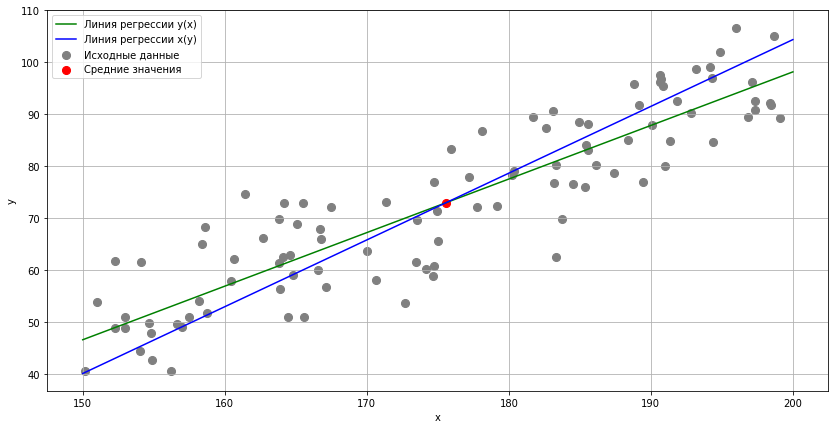

In [2200]:
#Создание точечного графика, наименования его осей, цвета, размера и названия для легенды
plt.figure(figsize=(14, 7))
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, c = "grey", s = 65, label = "Исходные данные")

#Данные для линии регрессии y(x) и нанесение ее на график, задание параметров
x_yx = np.array([150, 200])
y_yx = a + b * x_yx
plt.plot(x_yx, y_yx, "-", c = "green", label = "Линия регрессии y(x)")

#Данные для линии регрессии x(y) и нанесение ее на график, задание параметров
y_xy = np.array([150, 200])
x_xy = (y_xy-c)/d
plt.plot(y_xy, x_xy, "-", c = "blue", label = "Линия регрессии x(y)")

#Создание точки пересечения линии регрессий
plt.scatter(x_mean, y_mean, c = "red", s = 65, label = "Средние значения")

#Вывод легенды, сетки и графика на экран
plt.legend()
plt.grid()
plt.show()